In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, GRU, LSTM
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import plotly.express as px 

## Load Dataset

In [109]:
data = pd.read_csv('datasets/GlaucomaM.csv')

In [110]:
data.head()

,ag,at,as,an,ai,eag,eat,eas,ean,eai,...,tmt,tms,tmn,tmi,mr,rnf,mdic,emd,mv,Class
0,2.220,0.354,0.580,0.686,0.601,1.267,0.336,0.346,0.255,0.331,...,-0.018,-0.230,-0.510,-0.158,0.841,0.410,0.137,0.239,0.035,normal
1,2.681,0.475,0.672,0.868,0.667,2.053,0.440,0.520,0.639,0.454,...,-0.014,-0.165,-0.317,-0.192,0.924,0.256,0.252,0.329,0.022,normal
2,1.979,0.343,0.508,0.624,0.504,1.200,0.299,0.396,0.259,0.246,...,-0.097,-0.235,-0.337,-0.020,0.795,0.378,0.152,0.250,0.029,normal
3,1.747,0.269,0.476,0.525,0.476,0.612,0.147,0.017,0.044,0.405,...,-0.035,-0.449,-0.217,-0.091,0.746,0.200,0.027,0.078,0.023,normal
4,2.990,0.599,0.686,1.039,0.667,2.513,0.543,0.607,0.871,0.492,...,-0.105,0.084,-0.012,-0.054,0.977,0.193,0.297,0.354,0.034,normal


In [111]:
print(data["Class"].value_counts())

Class
normal      98
glaucoma    98
Name: count, dtype: int64


In [112]:
y = data['Class'].apply(lambda x: 0 if x == 'normal' else 1).to_numpy()
x = data.drop(['Class'], axis=1).to_numpy()

In [113]:
x.shape, y.shape

((196, 62), (196,))

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## GRU

In [115]:
model_gru = Sequential()
model_gru.add(GRU(62, return_sequences=True, input_shape=(62, 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(50, return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(50, return_sequences=False))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1, activation = "sigmoid"))

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
model_gru.fit(x_train, y_train, epochs=12, batch_size=30, validation_data=(x_test, y_test))

Epoch 1/12
6/6 [==============================] - 3s 120ms/step - loss: 0.6927 - accuracy: 0.5064 - val_loss: 0.6881 - val_accuracy: 0.4750
Epoch 2/12
6/6 [==============================] - 0s 34ms/step - loss: 0.6885 - accuracy: 0.5128 - val_loss: 0.6832 - val_accuracy: 0.4750
Epoch 3/12
6/6 [==============================] - 0s 39ms/step - loss: 0.6846 - accuracy: 0.5064 - val_loss: 0.6746 - val_accuracy: 0.4750
Epoch 4/12
6/6 [==============================] - 0s 37ms/step - loss: 0.6793 - accuracy: 0.5449 - val_loss: 0.6593 - val_accuracy: 0.5500
Epoch 5/12
6/6 [==============================] - 0s 35ms/step - loss: 0.6697 - accuracy: 0.6538 - val_loss: 0.6392 - val_accuracy: 0.9000
Epoch 6/12
6/6 [==============================] - 0s 36ms/step - loss: 0.6559 - accuracy: 0.6538 - val_loss: 0.5964 - val_accuracy: 0.8000
Epoch 7/12
6/6 [==============================] - 0s 34ms/step - loss: 0.6369 - accuracy: 0.6603 - val_loss: 0.5356 - val_accuracy: 0.8500
Epoch 8/12
6/6 [==========

2/2 [==============================] - 0s 7ms/step


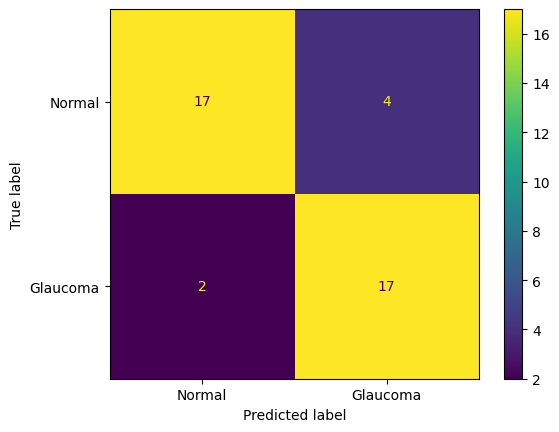

GRU Accuracy:  0.85


In [117]:
y_hat = model_gru.predict(x_test)
y_hat = np.round(y_hat).flatten()
gru_acc = accuracy_score(y_test, y_hat)

cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Glaucoma'])
disp.plot()
plt.show()
print("GRU Accuracy: ", gru_acc)

## LSTM

In [118]:
model_lstm = Sequential()
model_lstm.add(LSTM(62, return_sequences=True, input_shape=(62, 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation = "sigmoid"))

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [119]:
model_lstm.fit(x_train, y_train, epochs=12, batch_size=30, validation_data=(x_test, y_test))

Epoch 1/12
6/6 [==============================] - 3s 135ms/step - loss: 0.6954 - accuracy: 0.4423 - val_loss: 0.6897 - val_accuracy: 0.4750
Epoch 2/12
6/6 [==============================] - 0s 35ms/step - loss: 0.6906 - accuracy: 0.5064 - val_loss: 0.6852 - val_accuracy: 0.4750
Epoch 3/12
6/6 [==============================] - 0s 37ms/step - loss: 0.6855 - accuracy: 0.5064 - val_loss: 0.6800 - val_accuracy: 0.5000
Epoch 4/12
6/6 [==============================] - 0s 36ms/step - loss: 0.6807 - accuracy: 0.5064 - val_loss: 0.6773 - val_accuracy: 0.4750
Epoch 5/12
6/6 [==============================] - 0s 35ms/step - loss: 0.6882 - accuracy: 0.5128 - val_loss: 0.6739 - val_accuracy: 0.5000
Epoch 6/12
6/6 [==============================] - 0s 35ms/step - loss: 0.6803 - accuracy: 0.5449 - val_loss: 0.6602 - val_accuracy: 0.5250
Epoch 7/12
6/6 [==============================] - 0s 37ms/step - loss: 0.6733 - accuracy: 0.6218 - val_loss: 0.6531 - val_accuracy: 0.7250
Epoch 8/12
6/6 [==========

2/2 [==============================] - 0s 8ms/step


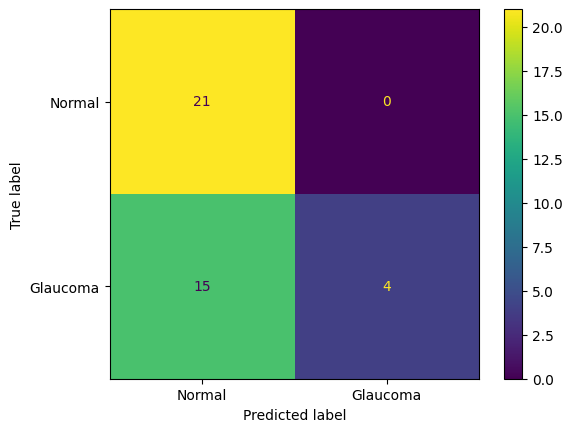

LSTM Accuracy:  0.625


In [120]:
y_hat = model_lstm.predict(x_test)
y_hat = np.round(y_hat).flatten()
lstm_acc = accuracy_score(y_test, y_hat)

cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Glaucoma'])
disp.plot()
plt.show()
print("LSTM Accuracy: ", lstm_acc)

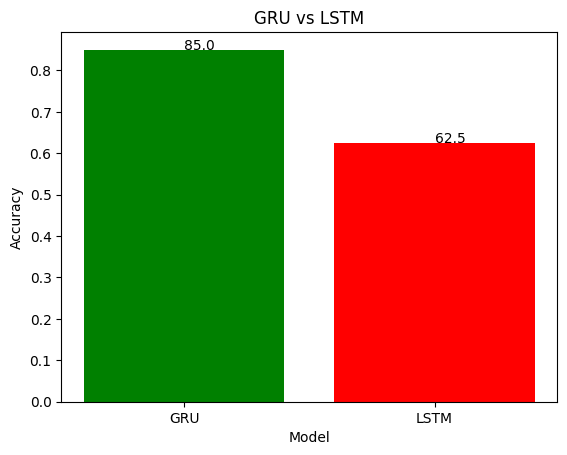

In [121]:
plt.bar(['GRU', 'LSTM'], [gru_acc, lstm_acc], color=['green', 'red'])
plt.text(0, gru_acc, str(round(gru_acc*100, 3)))
plt.text(1, lstm_acc, str(round(lstm_acc*100, 3)))
plt.title('GRU vs LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()